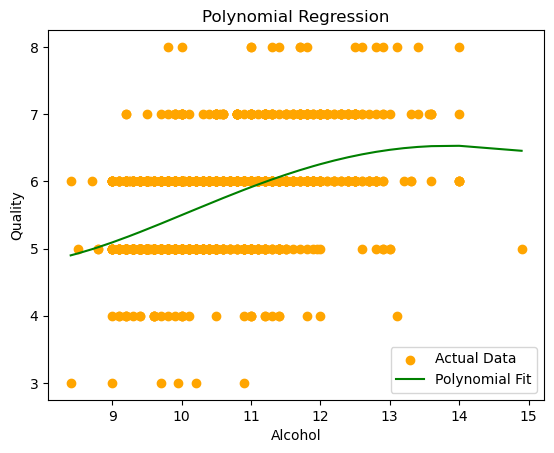

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load dataset
wine = pd.read_csv("WineQT.csv")

# Feature and target selection
X = wine[["alcohol"]].values
Y = wine["quality"].values

# Create polynomial features
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, Y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Plot using the original feature "alcohol"
# Sort the alcohol values for better visualization
sorted_indices = np.argsort(X.flatten())
sorted_alcohol = X.flatten()[sorted_indices]
sorted_poly = poly.transform(sorted_alcohol.reshape(-1, 1))
sorted_pred = model.predict(sorted_poly)

# Scatter plot for actual test data
plt.scatter(X.flatten(), Y, color="orange", label="Actual Data")

# Plot for the polynomial regression line
plt.plot(sorted_alcohol, sorted_pred, color="green", label="Polynomial Fit")

plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
